### Импортируем все библиотеки

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, roc_auc_score
)

### Загрузим данные и изучим основные характеристики

In [235]:
data = pd.read_csv('data.csv')

In [236]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Удалим колонку 'id' и колонку с пустыми значениями: 

In [237]:
data = data.drop(['id','Unnamed: 32'], axis=1)
data.shape

(569, 31)

Посмотрим на базовые статистики датасета:

In [12]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Для дальнейшего анализа разделим данные на целевую переменную и на признаки:  

In [99]:
class_label = data.diagnosis
features = data.drop('diagnosis', axis=1)

### Распределение целевой переменной

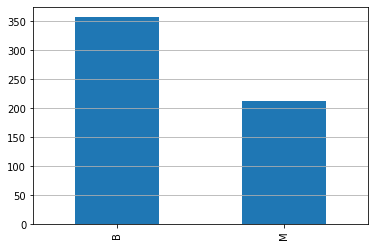

In [67]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [68]:
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### Построим гистограммы признаков, в зависимости от целевой переменной:

Для начала нормируем значения:

In [238]:
norm_feature = (features - features.mean()) / (features.std()) 

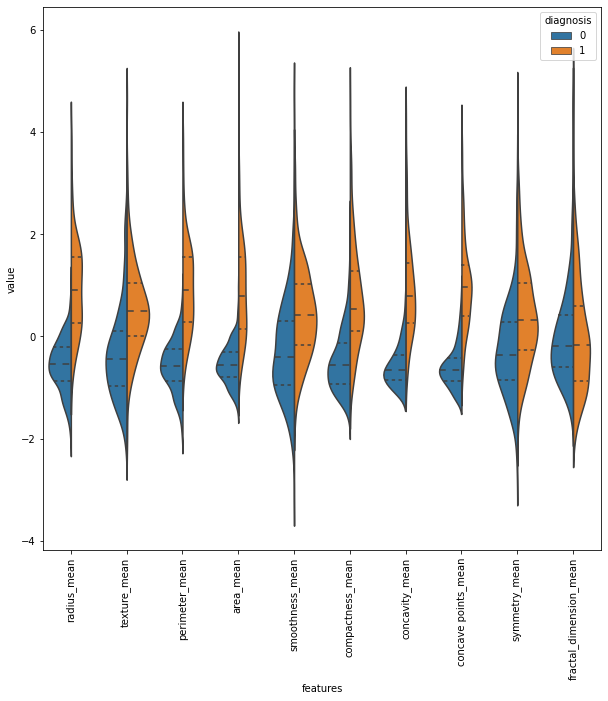

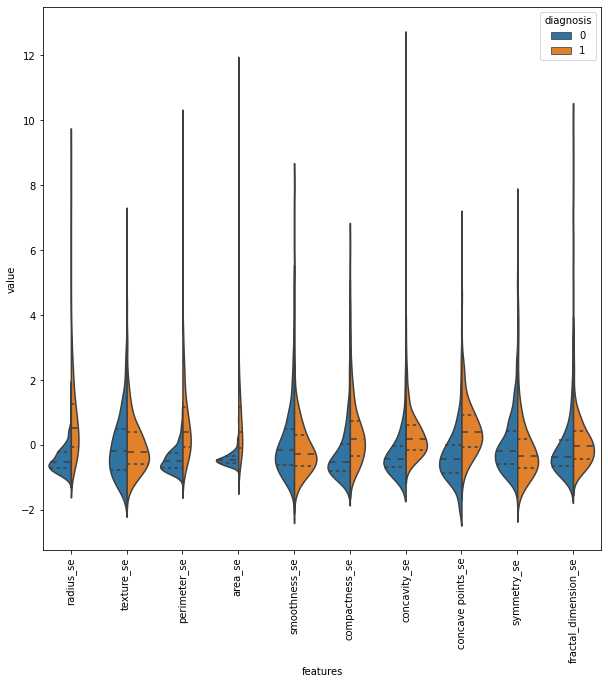

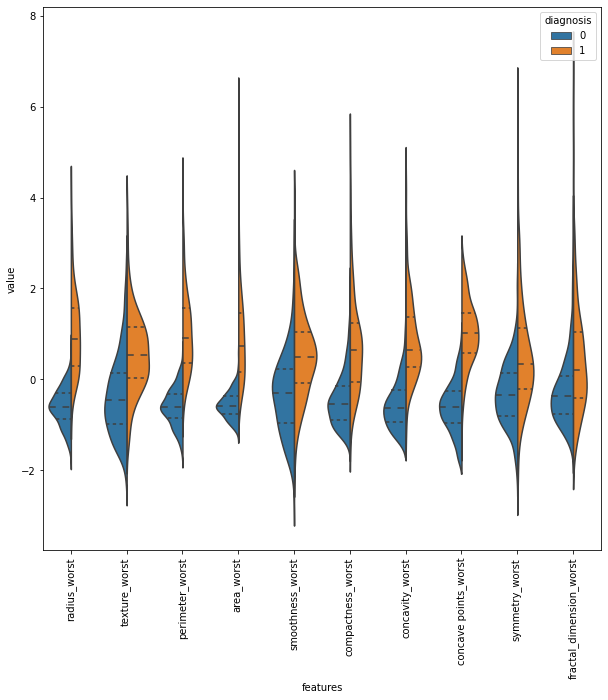

In [239]:
for start, end in [(0,10), (10,20), (20,31)]:
    norm_data = pd.concat([class_label, norm_feature.iloc[:, start:end]], axis=1)
    melted_data = pd.melt(norm_data,id_vars="diagnosis",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=melted_data,split=True, inner="quart")
    plt.xticks(rotation=90)
plt.show()

По графикам выше, мы можем увидеть, что по следующим признакам сложно классифицировать диагноз, так как наблюдается похожее распределение значений для каждого класса:

- smoothness_se
- symmetry_se
- fractal_dimension_mean
- fractal_dimension_se
- fractal_dimension_worst

В дальнейшем мы построим модели для двух наборов данных: с признаками выше и без них.

### Построим heatmap для матрицы корреляций

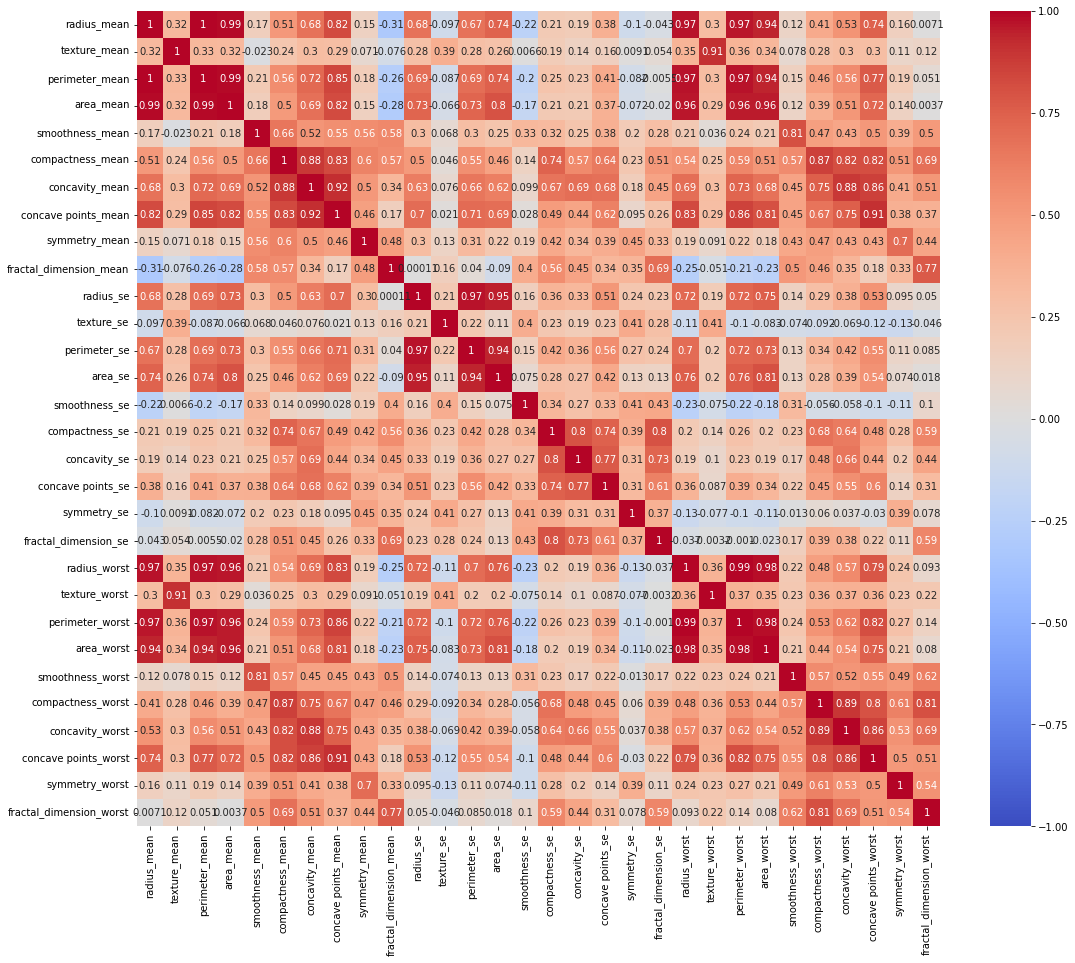

In [36]:
plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10000), annot=True, vmin=-1, center=0)
plt.show()

Как мы видим признаки **radius_mean**, **perimeter_mean** и **area_mean** коррелиарны. Это похоже на правду, так как периметр и площадь напрямую зависят от радиуса. Такая же ситуация наблюдается у признаков **radius_worst - perimeter_worst - area_worst** и **radius_se - perimeter_se - area_se**.

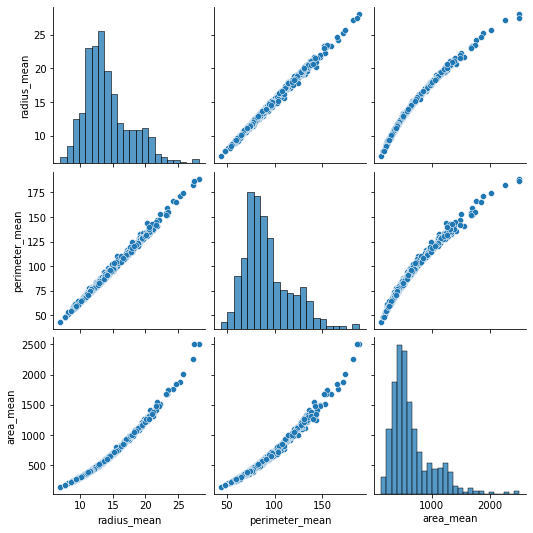

In [240]:
sns.pairplot(data=data[['radius_mean', 'perimeter_mean', 'area_mean']])
plt.show()

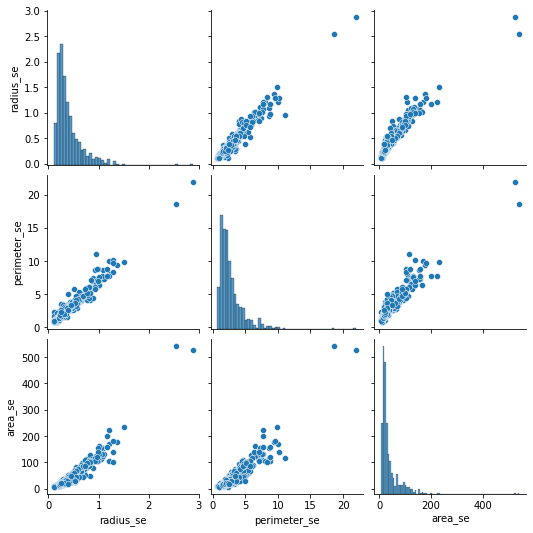

In [43]:
sns.pairplot(data=data[['radius_se', 'perimeter_se', 'area_se']])
plt.show()

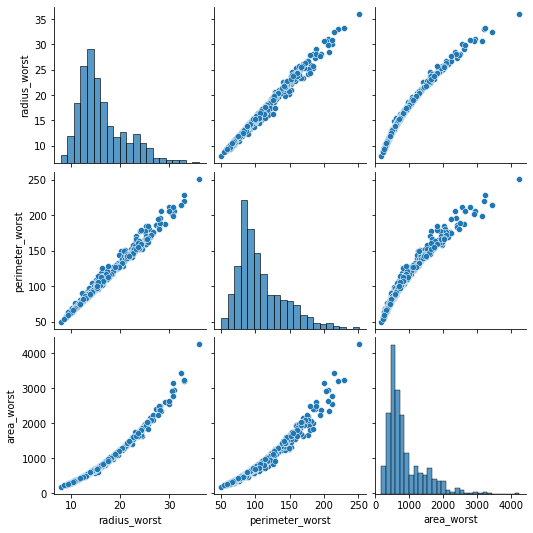

In [241]:
sns.pairplot(data=data[['radius_worst', 'perimeter_worst', 'area_worst']])
plt.show()

Для оптимизации вычислений алгоритма, оставим один из коррелированных признаков - радиус

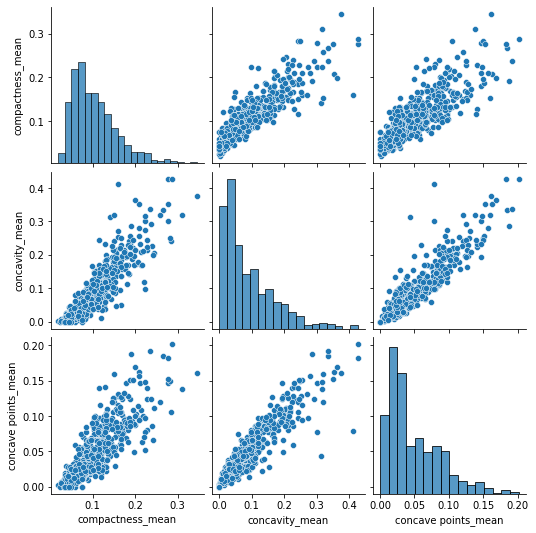

In [242]:
sns.pairplot(data=data[['compactness_mean','concavity_mean', 'concave points_mean']])
plt.show()

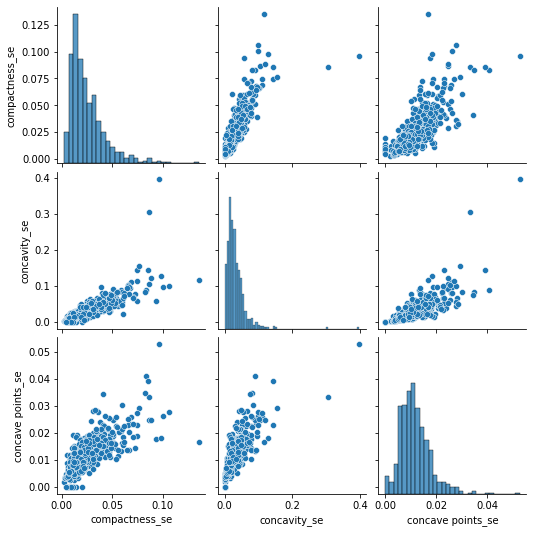

In [243]:
sns.pairplot(data=data[['compactness_se','concavity_se', 'concave points_se']])
plt.show()

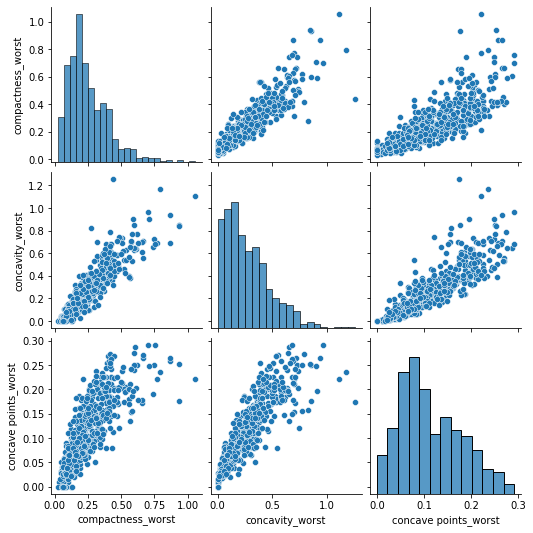

In [50]:
sns.pairplot(data=data[['compactness_worst','concavity_worst', 'concave points_worst']])
plt.show()

У признаков выше тоже наблюдается срогая корреляция. Оставим признак **concavity**. Остальные 2 не будем рассматривать при построении модели.

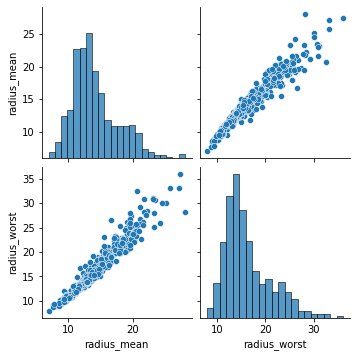

In [244]:
sns.pairplot(data=data[['radius_mean','radius_worst']])
plt.show()

Аналогичная ситуация у признаков **radius_mean**, **radius_worst** оставим признак **radius_mean**

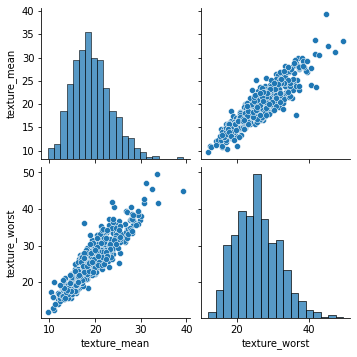

In [55]:
sns.pairplot(data=data[['texture_mean','texture_worst']])
plt.show()

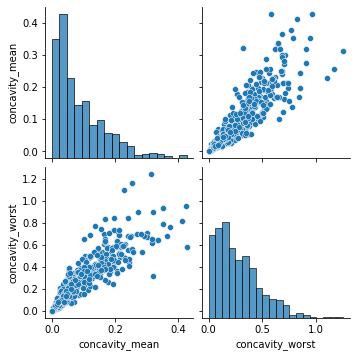

In [56]:
sns.pairplot(data=data[['concavity_mean','concavity_worst']])
plt.show()

То же сделаем и для **texture**

In [57]:
features_without_strong_corr = features.drop(['perimeter_mean','area_mean',
                                              'perimeter_se','area_se',
                                              'perimeter_worst','area_worst', 
                                              'compactness_mean', 'concave points_mean', 
                                              'compactness_se', 'concave points_se', 
                                              'compactness_worst', 'concave points_worst',
                                              'radius_worst', 'texture_worst'
                                             ], axis=1)

#### Построим заново heatmap для матрицы корреляций

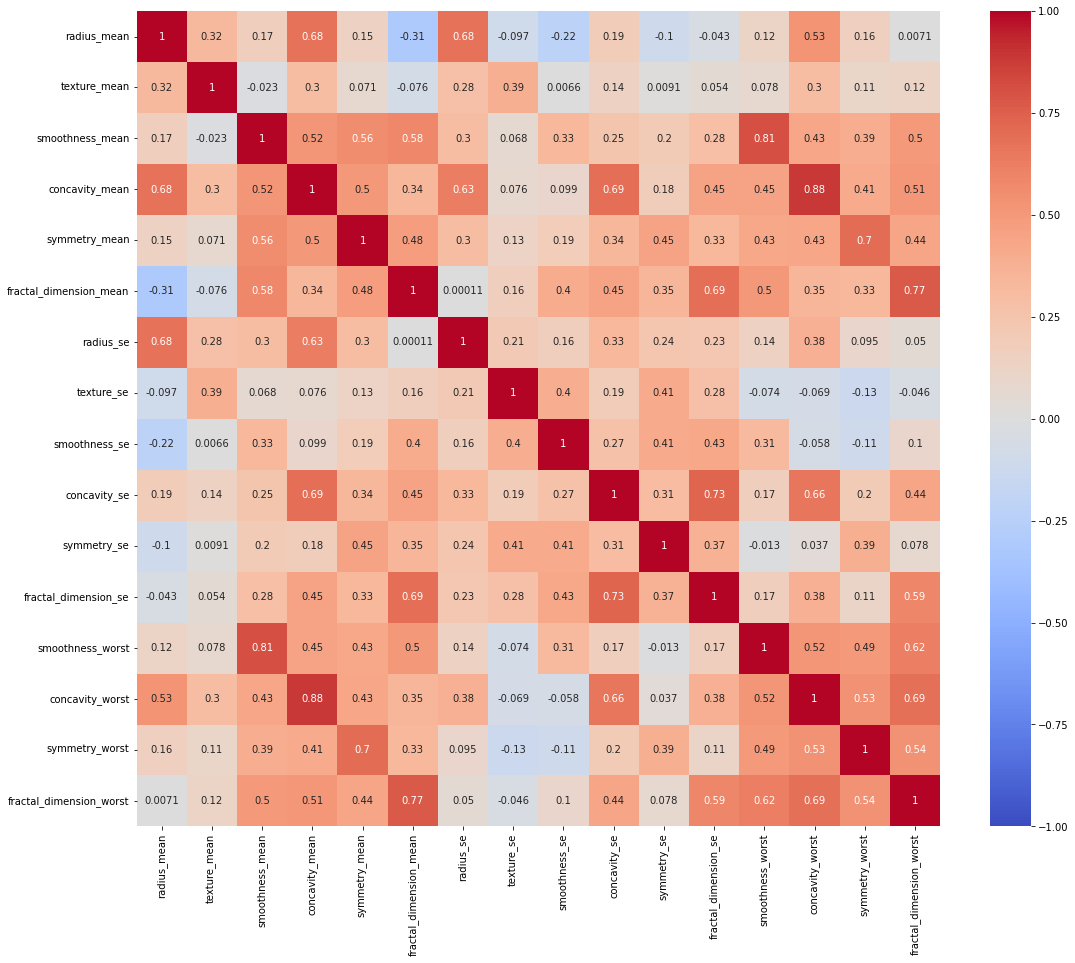

In [58]:
plt.subplots(figsize=(18,15))
sns.heatmap(features_without_strong_corr.corr(), cmap=sns.color_palette("coolwarm", 10000), annot=True, vmin=-1, center=0)
plt.show()

### Подготовим данные для последующего построения модели

#### Перекодируем целевую переменную:

In [100]:
class_label = class_label.apply(lambda x: 1 if x=='M' else 0)

In [104]:
class_label.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64

#### Как решили выше, создадим два набора признаков

In [112]:
featureset1 = features_without_strong_corr
featureset2 = features_without_strong_corr.drop(['smoothness_se', 'symmetry_se',
                                                 'fractal_dimension_mean',
                                                 'fractal_dimension_se',
                                                 'fractal_dimension_worst'
                                                ], axis=1)

### Для каждого набора проделаем следующие действия:

#### Разделим выборку на train и test

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    featureset1, class_label, test_size=0.30, random_state=10, stratify=class_label
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 16), (171, 16), (398,), (171,))

#### Приведем все непрерывные переменные к одному масштабу при помощи стандартизации

In [174]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

### Построим модель kNN без подбора параметров

In [202]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_test = knn.predict(X_test_scaled)

quality(y_pred_test, y_test)

Accuracy:  0.936
Precision: 0.828
Recall:    1.000
F1-score:  0.906


#### Построем ROC-кривую и посчитаем площадь под ней (ROC-AUC):

In [176]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
roc_auc

0.9140625

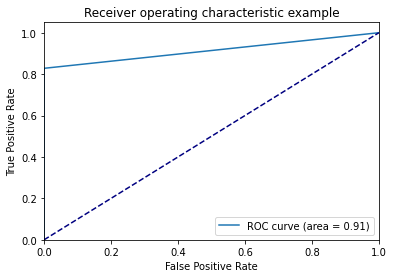

In [164]:
plt.figure()
plt.plot(fpr,tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

#### Подберем параметр числа соседей, используя кросс-валидацию:

In [196]:
%%time
param_grid = {
        'n_neighbors': range(1, 50),
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=50, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 50 folds for each of 49 candidates, totalling 2450 fits
Best CV score: 0.920, best CV k: 5
Resulting test score: 0.906
Wall time: 12.9 s


#### Посчитаем заново все метрики и построим ROC кривую

In [192]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_test = knn.predict(X_test_scaled)

quality(y_pred_test, y_test)

Accuracy:  0.936
Precision: 0.828
Recall:    1.000
F1-score:  0.906


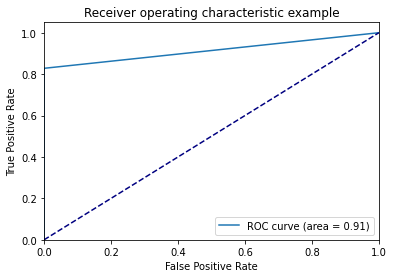

In [193]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr,tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

#### Мы пришли к первоначальному результату. Это произошло, потому что мы получили значение коэффициента, равный значению по умолчанию. 

### Проделаем аналогичные действия для второго набора признаков

In [199]:
X_train2, X_test2, y_train, y_test = train_test_split(
    featureset2, class_label, test_size=0.30, random_state=10, stratify=class_label
)
X_train2.shape, X_test2.shape, y_train.shape, y_test.shape

((398, 11), (171, 11), (398,), (171,))

In [200]:
scaler = StandardScaler()

X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

In [201]:
%%time
param_grid = {
        'n_neighbors': range(1, 50),
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=50, scoring='f1', verbose=1)
grid_search.fit(X_train2_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 


test_predictions = grid_search.best_estimator_.predict(X_test2_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 50 folds for each of 49 candidates, totalling 2450 fits
Best CV score: 0.934, best CV k: 5
Resulting test score: 0.919
Wall time: 5.46 s


In [194]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train2_scaled, y_train)
y_pred_test = knn.predict(X_test2_scaled)

quality(y_pred_test, y_test)

Accuracy:  0.942
Precision: 0.891
Recall:    0.950
F1-score:  0.919


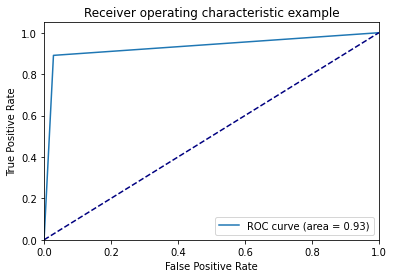

In [195]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr,tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

#### Вывод: используя второй набор признаков, мы получаем лучшую средневзвешанную метрику F1 и меньшее время на вычисление. Несмотря на это, мы получили меньший recall, соответственно большую вероятность пропустить опасное заболевание. По этой причине целесообразней использовать модель с первым набором признаков.

## Построим модель логистической регрессии

#### Уберем линейно зависимые признаки, корреляция Пирсона между которыми превышает 0.85

В нашем случае, если посмотреть на heatmap матрицы коррелиации, это признаки **concavity_mean** и **concavity_worst**. Оставим только первый признак.

In [204]:
features_logit = features_without_strong_corr.drop('concavity_worst', axis=1)

Построим заново heatmap для матрицы корреляций

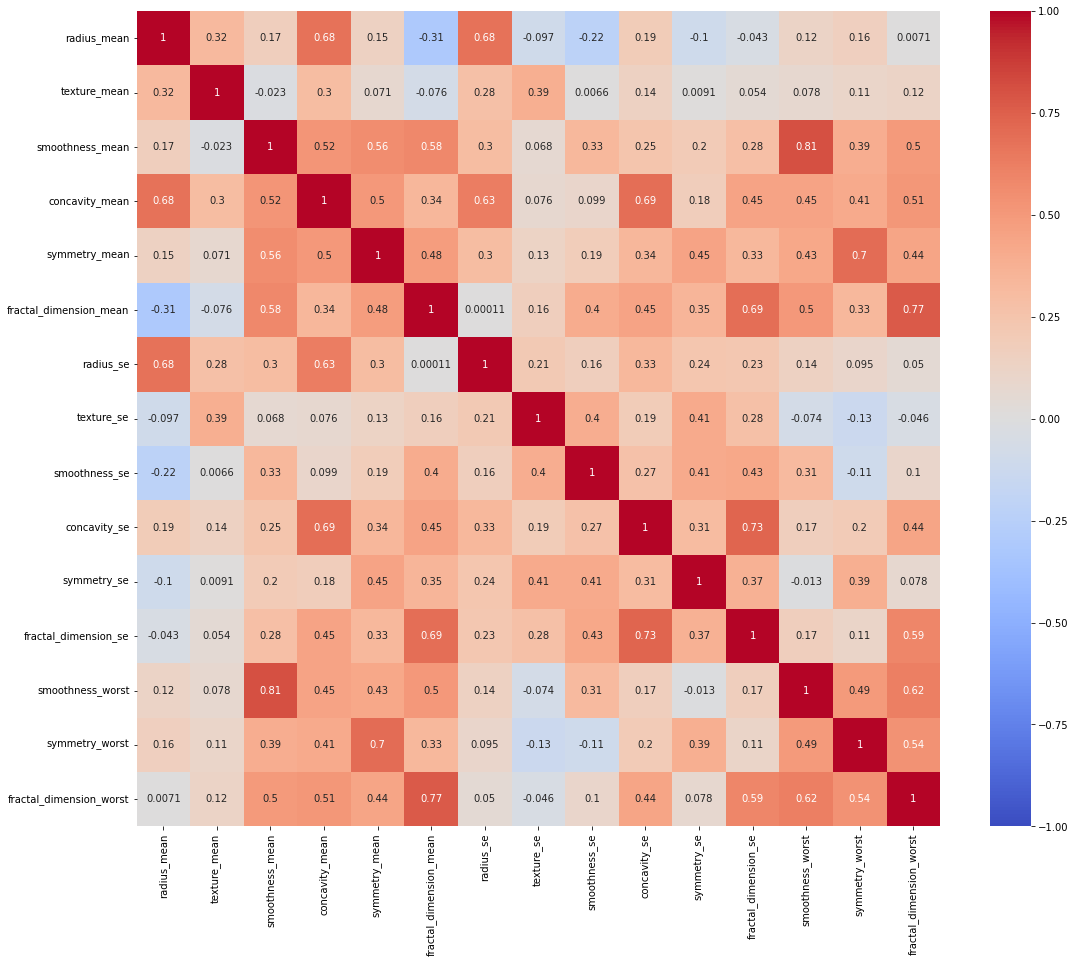

In [206]:
plt.subplots(figsize=(18,15))
sns.heatmap(features_logit.corr(), cmap=sns.color_palette("coolwarm", 10000), annot=True, vmin=-1, center=0)
plt.show()

#### Разделим выборку на train и test

In [208]:
X_train_log, X_test_log, y_train, y_test = train_test_split(
    features_logit, class_label, test_size=0.30, random_state=10, stratify=class_label
)
X_train_log.shape, X_test_log.shape, y_train.shape, y_test.shape

((398, 15), (171, 15), (398,), (171,))

#### Приведем все непрерывные переменные к одному масштабу при помощи стандартизации

In [216]:
scaler = StandardScaler()

X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled = scaler.transform(X_test_log)

#### Построим модель Логистической регрессии, не изменяя гиперпараметры

In [217]:
log_reg = LogisticRegression(penalty = 'none')

log_reg.fit(X_train_log_scaled, y_train)
print("Train quality:")
quality(log_reg.predict(X_train_log_scaled), y_train)
print("\nTest quality:")
y_pred_test = log_reg.predict(X_test_log_scaled)
quality(y_pred_test, y_test)

Train quality:
Accuracy:  0.977
Precision: 0.966
Recall:    0.973
F1-score:  0.969

Test quality:
Accuracy:  0.971
Precision: 0.953
Recall:    0.968
F1-score:  0.961


На данном этапе значение средневзвешанной метрики F1 выше, чем при использовании Метода ближайших соседей (kNN). Но метрика полноты (Recall) ниже. Попробуем получить наилучшее значение данной метрики.

#### Построим ROC-кривую и посчитаем площадь под ней

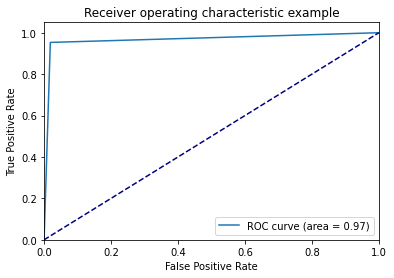

In [218]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr,tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

#### Влияние признаков на целевую переменную:

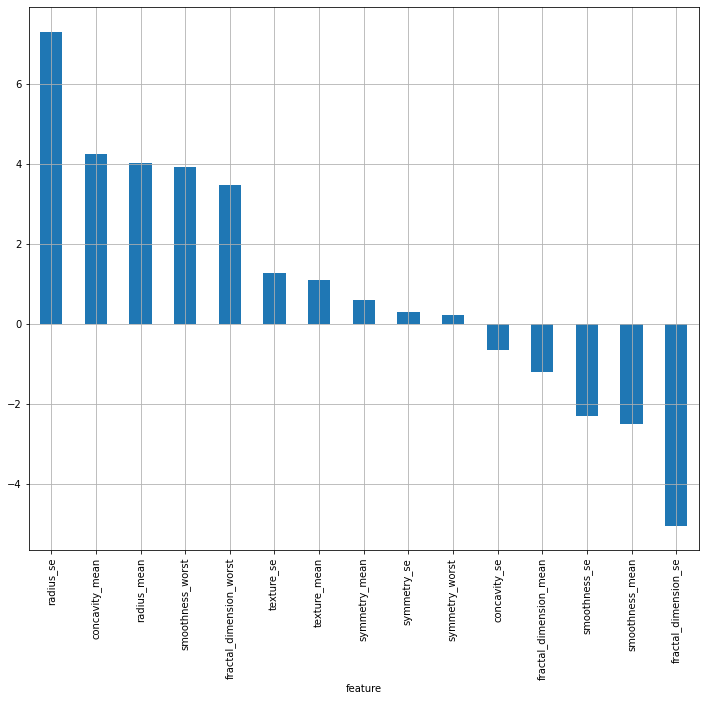

In [222]:
featureImportance = pd.DataFrame({"feature": features_logit.columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar(figsize=(12,10), grid=True);

### Настроем параметр регуляризации C на кросс-валидации

### L1 Lasso

In [232]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1')
clf = GridSearchCV(log_reg, parameters, scoring = 'recall', cv = 30)

clf.fit(X_train_log_scaled, y_train)

print("Best CV score: {:.3f}, best CV C: {}".format(
    clf.best_score_, clf.best_estimator_.C)
) 


test_predictions = clf.best_estimator_.predict(X_test_log_scaled)
print("Resulting test recall score: {:.3f}".format(recall_score(test_predictions, y_test)))


Best CV score: 0.938, best CV C: 1
Resulting test recall score: 0.968


### L2 Ridge

In [233]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

log_reg = LogisticRegression(penalty = 'l2')
clf = GridSearchCV(log_reg, parameters, scoring = 'recall', cv = 30)

clf.fit(X_train_log_scaled, y_train)

print("Best CV score: {:.3f}, best CV C: {}".format(
    clf.best_score_, clf.best_estimator_.C)
) 


test_predictions = clf.best_estimator_.predict(X_test_log_scaled)
print("Resulting test recall score: {:.3f}".format(recall_score(test_predictions, y_test)))


Best CV score: 0.938, best CV C: 1
Resulting test recall score: 0.968


Мы выяснили, что наилучшим значением коэффициентом регуляризации С, является значение по умолчанию = 1 